<a href="https://colab.research.google.com/github/RehabEmam228/Bertlesmann-challenge/blob/master/MNIST_fashion_using_Relu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!wget -c https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/intro-to-pytorch/helper.py

--2020-01-26 10:57:26--  https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/intro-to-pytorch/helper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 416 Range Not Satisfiable

    The file is already fully retrieved; nothing to do.



In [0]:
import torch
from torch import nn, optim
import torch.nn.functional as F
from torchvision import datasets, transforms
import helper

In [0]:
transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))
])
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

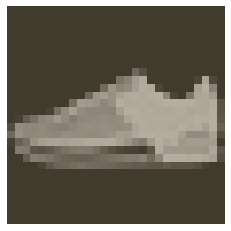

In [0]:
image, label = next(iter(trainloader))
helper.imshow(image[0,:]);

In [0]:
model = nn.Sequential(
    nn.Dropout(0.5),
    nn.Linear(784, 256),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(256, 128),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(128, 10),
    nn.ReLU(),
    nn.LogSoftmax(dim=1)
    
)
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [0]:
epochs = 15
steps = 0

train_losses, test_losses = [], []
for e in range(epochs):
  model.train()
  running_loss=0
  for images , labels in trainloader:
    steps += 1
    # flatten images
    images = images.view(images.shape[0], -1)
    optimizer.zero_grad()
    output = model(images)
    loss = criterion(output, labels)
    loss.backward()
    optimizer.step()
    running_loss += loss.item()
  else:
    test_loss = 0
    accuracy = 0
    with torch.no_grad():
      for images, labels in testloader:
        images = images.view(images.shape[0], -1)
        output = model(images)
        test_loss += criterion(output, labels)
        probabilities = torch.exp(output)
        top_p, top_class = probabilities.topk(1, dim=1)
        equals = top_class == labels.view(*top_class.shape)
        accuracy += torch.mean(equals.type(torch.FloatTensor))
  train_losses.append(running_loss/len(trainloader))
  test_losses.append(test_loss/len(testloader))

  print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(trainloader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(testloader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))

Epoch: 1/15..  Training Loss: 0.759..  Test Loss: 0.658..  Test Accuracy: 0.763
Epoch: 2/15..  Training Loss: 0.604..  Test Loss: 0.620..  Test Accuracy: 0.779
Epoch: 3/15..  Training Loss: 0.577..  Test Loss: 0.595..  Test Accuracy: 0.789
Epoch: 4/15..  Training Loss: 0.565..  Test Loss: 0.586..  Test Accuracy: 0.790
Epoch: 5/15..  Training Loss: 0.552..  Test Loss: 0.568..  Test Accuracy: 0.800
Epoch: 6/15..  Training Loss: 0.547..  Test Loss: 0.562..  Test Accuracy: 0.805
Epoch: 7/15..  Training Loss: 0.534..  Test Loss: 0.570..  Test Accuracy: 0.800
Epoch: 8/15..  Training Loss: 0.531..  Test Loss: 0.563..  Test Accuracy: 0.803
Epoch: 9/15..  Training Loss: 0.528..  Test Loss: 0.567..  Test Accuracy: 0.798
Epoch: 10/15..  Training Loss: 0.523..  Test Loss: 0.542..  Test Accuracy: 0.802
Epoch: 11/15..  Training Loss: 0.515..  Test Loss: 0.546..  Test Accuracy: 0.804
Epoch: 12/15..  Training Loss: 0.516..  Test Loss: 0.557..  Test Accuracy: 0.802
Epoch: 13/15..  Training Loss: 0.512.

In [0]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

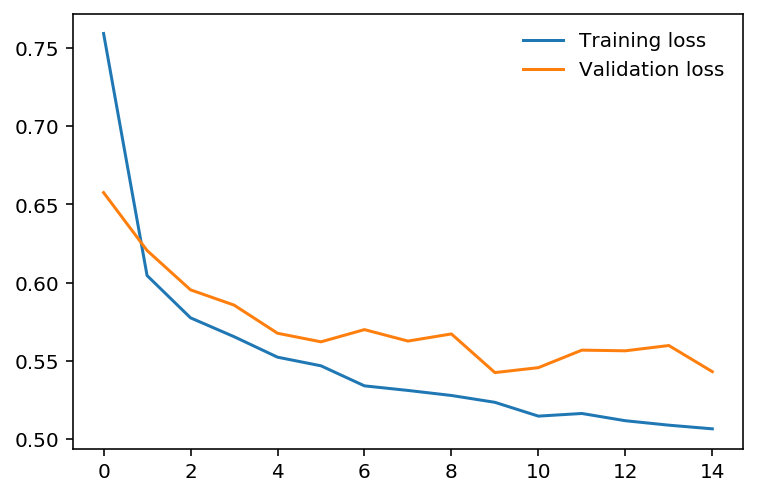

In [0]:
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)

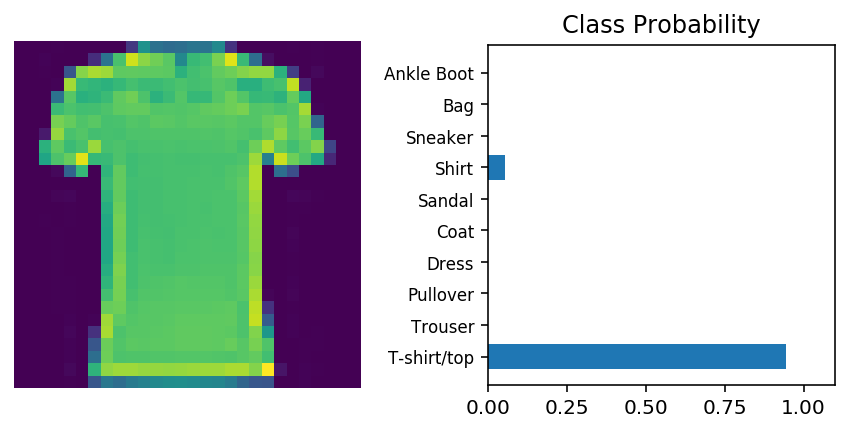

In [0]:
model.eval()

images, labels = next(iter(testloader))

img = images[0].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model.forward(img)

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
helper.view_classify(img.view(1, 28, 28), ps, version='Fashion')

In [0]:
torch.save(model.state_dict(), 'checkpoint.pth')